# Problem statement
Telecom businesses must identify the consumers who are most likely to leave in order to reduce customer turnover. In this project, we'll analyze customer-level data from a top telecom company, create predictive models to find customers who are most likely to leave, and pinpoint the key signs of churn.

The primary objective of this firm is to retain highly profitable consumers.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Reading, understanding and Handling missing values 

In [2]:
#Reading the dataset
df01 = pd.read_csv('telecom_churn_data.csv')
df01.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014   197.385  ...            0        1.0        1.0   
1            9/30/2014    34.047  ...            0        NaN        1.0   
2            9/30/2014   167.690  ...            0        NaN        NaN   
3            9/30/2014   221.338  ...            0        NaN        NaN   
4            9/30/2014   261.636  ...            0        0.0        NaN   
5            9/30/2014    50.258  ...            0        NaN        NaN   
6            9/30/2014   429.023  ...            0        NaN        NaN   
7            9/30/2014  1069.180  ...            0        NaN        NaN   
8            9/30/2014   378.721  ...            0        NaN        1.0   
9            9/30/2014   119.518  ...            0        NaN        1.0   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968       30.40        0.00      101.20        3.58  
1        1.0        NaN  1006        0.00        0.00        0.00        0.00  
2        NaN        1.0  1103        0.00        0.00        4.17        0.00  
3        NaN        NaN  2491        0.00        0.00        0.00        0.00  
4        NaN        NaN  1526        0.00        0.00        0.00        0.00  
5        NaN        NaN  1471        0.00        0.00        0.00        0.00  
6        NaN        NaN  1673        0.00        0.00        0.00        0.00  
7        NaN        NaN   802       57.74       19.38       18.74        0.00  
8        1.0        NaN   315       21.03      910.65      122.16        0.00  
9        NaN        NaN   902        0.00        0.00        0.00        0.00  

[10 rows x 226 columns]

In [3]:
df01.shape

(99999, 226)

In [4]:
df01.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [5]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# Checking the number of missing values in each column
df01.isnull().sum().sort_values(ascending=False)

arpu_3g_6            74846
night_pck_user_6     74846
total_rech_data_6    74846
arpu_2g_6            74846
max_rech_data_6      74846
                     ...  
max_rech_amt_7           0
max_rech_amt_6           0
total_rech_amt_9         0
total_rech_amt_8         0
sep_vbc_3g               0
Length: 226, dtype: int64

In [7]:
#Now checking the percentage of missing values in each column

df01_null = round(100*(df01.isnull().sum()/len(df01.index)), 2).sort_values(ascending=False)
df01_null

arpu_3g_6            74.85
night_pck_user_6     74.85
total_rech_data_6    74.85
arpu_2g_6            74.85
max_rech_data_6      74.85
                     ...  
max_rech_amt_7        0.00
max_rech_amt_6        0.00
total_rech_amt_9      0.00
total_rech_amt_8      0.00
sep_vbc_3g            0.00
Length: 226, dtype: float64

In [8]:
# List the columns having more than 30% missing values

columns_with_more_than_30 = df01_null[df01_null > 30]
columns_with_more_than_30.sort_values(ascending=False)

arpu_3g_6                   74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
night_pck_user_6            74.85
count_rech_2g_7             74.43
arpu_3g_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
fb_user_7                   74.43
night_pck_user_7            74.43
max_rech_data_7             74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
av_rech_amt_data_9          74.08
count_rech_2g_9             74.08
arpu_2g_9                   74.08
night_pck_user_9            74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
max_rech_data_9             74.08
fb_user_9                   74.08
count_rech_3g_

In [9]:
# Delete the columns having more than 30% missing values
columns_to_delete = columns_with_more_than_30.index
df01 = df01.drop(columns=columns_to_delete)

In [10]:
df01.shape

(99999, 186)

In [11]:
#Again checking the percentage of missing values in each column
round(100*(df01.isnull().sum()/len(df01.index)), 2).sort_values(ascending=False)

loc_og_t2m_mou_9      7.75
loc_ic_t2m_mou_9      7.75
offnet_mou_9          7.75
std_ic_t2f_mou_9      7.75
roam_ic_mou_9         7.75
                      ... 
max_rech_amt_7        0.00
max_rech_amt_8        0.00
max_rech_amt_9        0.00
last_day_rch_amt_6    0.00
sep_vbc_3g            0.00
Length: 186, dtype: float64

In [12]:
df01.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  monthly_3g_9  sachet_3g_6  sachet_3g_7  \
0            9/30/2014  197.385  ...             0            0            0   
1            9/30/2014   34.047  ...             0            0            0   
2            9/30/2014  167.690  ...             0            0            0   
3            9/30/2014  221.338  ...             0            0            0   
4            9/30/2014  261.636  ...             0            0            0   

   sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0            0            0   968        30.4         0.0      101.20   
1            0            0  1006         0.0         0.0        0.00   
2            0            0  1103         0.0         0.0        4.17   
3            0            0  2491         0.0         0.0        0.00   
4            0            0  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 186 columns]

In [13]:
#droping the date columns as the date columns are not required in our analysis
df01=df01.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'],axis=1)

In [14]:
# Drop circle_id column
df01 = df01.drop('circle_id', axis=1)

In [15]:
df01.shape

(99999, 177)

## Filter high-value customers

In [16]:
#the average recharge amount in the first two months (i.e. 6 & 7)

df01['avg_rech_amt_6_7'] = (df01['total_rech_amt_6'] + df01['total_rech_amt_7'])/2

In [17]:
# X is the 70th percentile of the average recharge amount in the first two months
x = df01['avg_rech_amt_6_7'].quantile(0.7)
x

368.5

In [18]:
#filtering the high-value customers
df01 = df01[df01['avg_rech_amt_6_7'] >= x]
df01.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7      7000701601             0.0             0.0             0.0  1069.180   
8      7001524846             0.0             0.0             0.0   378.721   
13     7002191713             0.0             0.0             0.0   492.846   
16     7000875565             0.0             0.0             0.0   430.975   
17     7000187447             0.0             0.0             0.0   690.008   

      arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  ...  sachet_3g_6  \
7   1349.850  3171.480  500.000        57.84        54.68  ...            0   
8    492.223   137.362  166.787       413.69       351.03  ...            0   
13   205.671   593.260  322.732       501.76       108.39  ...            0   
16   299.869   187.894  206.490        50.51        74.01  ...            0   
17    18.980    25.499  257.583      1185.91         9.28  ...            0   

    sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  \
7             0            0            0   802       57.74       19.38   
8             0            0            0   315       21.03      910.65   
13            0            0            0  2607        0.00        0.00   
16            0            0            0   511        0.00        2.45   
17            0            0            0   667        0.00        0.00   

    jun_vbc_3g  sep_vbc_3g  avg_rech_amt_6_7  
7        18.74         0.0            1185.0  
8       122.16         0.0             519.0  
13        0.00         0.0             380.0  
16       21.89         0.0             459.0  
17        0.00         0.0             408.0  

[5 rows x 178 columns]

In [19]:
df01.shape

(30011, 178)

After filtering the high-value customers, we get approx 30k rows.

In [20]:
# Count the rows having more than 50% missing values
df01_missingvalue_50 = df01[(df01.isnull().sum(axis=1)) > (len(df01.columns)//2)]
df01_missingvalue_50

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
2185      7000237332             NaN             NaN             NaN   
3506      7002324263             NaN             NaN             NaN   
4190      7000293582             NaN             NaN             NaN   
5220      7000635396             NaN             NaN             NaN   
5539      7001126462             NaN             NaN             NaN   
...              ...             ...             ...             ...   
96449     7000343105             NaN             NaN             NaN   
96494     7001923811             NaN             NaN             NaN   
97608     7000444267             NaN             NaN             NaN   
97804     7002369377             NaN             NaN             NaN   
98943     7000806379             NaN             NaN             NaN   

         arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  ...  \
2185    386.514  386.506  386.491  386.493          NaN          NaN  ...   
3506    996.558    0.000    0.000    0.000          NaN          NaN  ...   
4190   2502.516    0.000    0.000    0.000          NaN          NaN  ...   
5220    427.619  213.786  213.799  427.587          NaN          NaN  ...   
5539    249.000  243.106  374.000  770.397          NaN          NaN  ...   
...         ...      ...      ...      ...          ...          ...  ...   
96449   314.000  331.000  342.000  137.000          NaN          NaN  ...   
96494   213.818  427.645  213.804  427.586          NaN          NaN  ...   
97608   429.759  386.505  386.500    0.000          NaN          NaN  ...   
97804   856.801    0.000  558.013  427.605          NaN          NaN  ...   
98943   427.626  427.592  213.801  213.810          NaN          NaN  ...   

       sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  \
2185             0            0            0            0   882      172.71   
3506             0            0            0            0  2033        0.00   
4190             0            0            0            0   266        0.00   
5220             0            0            0            0  1112        0.00   
5539             0            0            0            0  3057        0.00   
...            ...          ...          ...          ...   ...         ...   
96449            0            0            0            0   303        0.00   
96494            0            0            0            0   873        0.00   
97608            1            0            0            0   385      490.42   
97804            0            0            0            1   528      635.13   
98943            0            0            0            0   489        0.00   

       jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  avg_rech_amt_6_7  
2185       657.55        9.22         0.0             455.0  
3506         0.00        0.00         0.0             437.5  
4190         0.00      303.54         0.0            1277.5  
5220         0.00        0.00         0.0             378.0  
5539         0.00        0.00         0.0             549.0  
...           ...         ...         ...               ...  
96449        0.00        0.00         0.0             550.0  
96494      349.77        0.00         0.0             378.0  
97608      464.88      791.22         0.0             480.5  
97804      435.64        0.00         0.0             504.0  
98943        0.00        0.00         0.0             504.0  

[114 rows x 178 columns]

In [21]:
# Deleting the rows having more than 50% missing values
df01 = df01.drop(df01_missingvalue_50.index)

In [22]:
df01.shape

(29897, 178)

In [23]:
#Again checking the percentage of missing values in each column
missing_value = round(100*(df01.isnull().sum()/len(df01.index)), 2).sort_values(ascending=False)
missing_value.head(35)

loc_ic_mou_9        5.32
og_others_9         5.32
loc_og_t2t_mou_9    5.32
loc_ic_t2t_mou_9    5.32
loc_og_t2m_mou_9    5.32
loc_og_t2f_mou_9    5.32
loc_og_t2c_mou_9    5.32
std_ic_t2m_mou_9    5.32
loc_og_mou_9        5.32
std_og_t2t_mou_9    5.32
roam_og_mou_9       5.32
std_ic_t2o_mou_9    5.32
std_og_t2m_mou_9    5.32
std_og_t2f_mou_9    5.32
spl_og_mou_9        5.32
std_og_t2c_mou_9    5.32
std_og_mou_9        5.32
isd_og_mou_9        5.32
std_ic_t2t_mou_9    5.32
std_ic_mou_9        5.32
onnet_mou_9         5.32
spl_ic_mou_9        5.32
ic_others_9         5.32
isd_ic_mou_9        5.32
loc_ic_t2f_mou_9    5.32
offnet_mou_9        5.32
loc_ic_t2m_mou_9    5.32
std_ic_t2f_mou_9    5.32
roam_ic_mou_9       5.32
loc_og_t2t_mou_8    2.76
og_others_8         2.76
roam_ic_mou_8       2.76
std_og_t2m_mou_8    2.76
isd_ic_mou_8        2.76
std_ic_t2o_mou_8    2.76
dtype: float64

In [24]:
# listing the Columns of MOU Sep(9)
# Find columns with a specific missing percentage (e.g., 5.32%)
target_percentage = 5.32
columns_with_target_percentage = missing_value[missing_value == target_percentage]

# List the column names with the target percentage
column_names_with_target_percentage = columns_with_target_percentage.index.tolist()

# Print the column names
print(column_names_with_target_percentage)

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [25]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df01_null_mou9 = df01[(df01['loc_og_t2m_mou_9'].isnull()) & (df01['loc_ic_t2f_mou_9'].isnull()) & (df01['roam_og_mou_9'].isnull()) & (df01['std_ic_t2m_mou_9'].isnull()) &
  (df01['loc_og_t2t_mou_9'].isnull()) & (df01['std_ic_t2t_mou_9'].isnull()) & (df01['loc_og_t2f_mou_9'].isnull()) & (df01['loc_ic_mou_9'].isnull()) &
  (df01['loc_og_t2c_mou_9'].isnull()) & (df01['loc_og_mou_9'].isnull()) & (df01['std_og_t2t_mou_9'].isnull()) & (df01['roam_ic_mou_9'].isnull()) &
  (df01['loc_ic_t2m_mou_9'].isnull()) & (df01['std_og_t2m_mou_9'].isnull()) & (df01['loc_ic_t2t_mou_9'].isnull()) & (df01['std_og_t2f_mou_9'].isnull()) & 
  (df01['std_og_t2c_mou_9'].isnull()) & (df01['og_others_9'].isnull()) & (df01['std_og_mou_9'].isnull()) & (df01['spl_og_mou_9'].isnull()) & 
  (df01['std_ic_t2f_mou_9'].isnull()) & (df01['isd_og_mou_9'].isnull()) & (df01['std_ic_mou_9'].isnull()) & (df01['offnet_mou_9'].isnull()) & 
  (df01['isd_ic_mou_9'].isnull()) & (df01['ic_others_9'].isnull()) & (df01['std_ic_t2o_mou_9'].isnull()) & (df01['onnet_mou_9'].isnull()) & 
  (df01['spl_ic_mou_9'].isnull())]

df01_null_mou9.head(10)

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7       7000701601             0.0             0.0             0.0  1069.180   
97      7000589828             0.0             0.0             0.0   374.863   
111     7001300706             0.0             0.0             0.0   596.301   
143     7000106299             0.0             0.0             0.0   695.609   
188     7000340381             0.0             0.0             0.0   734.641   
320     7000959346             0.0             0.0             0.0  1415.186   
358     7002255278             0.0             0.0             0.0   688.670   
435     7000884629             0.0             0.0             0.0   438.017   
478     7000104470             0.0             0.0             0.0   637.800   
490     7000369789             0.0             0.0             0.0   679.329   

       arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  ...  sachet_3g_6  \
7    1349.850  3171.480  500.000        57.84        54.68  ...            0   
97    294.023   183.043    0.000       433.59       415.66  ...            0   
111   146.073     0.000    0.000        55.19         3.26  ...            1   
143    39.981     0.000    0.000      1325.91        28.61  ...            0   
188   183.668     0.000    0.000         4.38         0.98  ...            0   
320  1754.735   229.575   -1.000       120.19       236.14  ...            0   
358   205.780   707.910   -5.000        68.34        38.93  ...            0   
435   624.072   351.184  735.324         0.00         0.00  ...            0   
478   480.074     0.000    0.000      1241.99      1026.66  ...            0   
490     0.000     0.000    0.000       189.51          NaN  ...            0   

     sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  \
7              0            0            0   802       57.74       19.38   
97             0            0            0   502        0.00        0.00   
111            0            0            0   332        0.00        0.00   
143            0            0            0   264        0.00        0.00   
188            0            0            0   244        0.00      831.48   
320            0            0            0   896        0.00        0.00   
358            0            0            0  2597        1.22       17.89   
435            0            0            0   749      615.50      552.17   
478            0            0            0   356        0.00        0.00   
490            0            0            0   341        0.00        0.00   

     jun_vbc_3g  sep_vbc_3g  avg_rech_amt_6_7  
7         18.74         0.0            1185.0  
97         0.00         0.0             380.0  
111        0.00         0.0             441.0  
143        0.00         0.0             418.0  
188     1223.04         0.0             492.0  
320        0.00         0.0            1828.5  
358      383.36         0.0             750.0  
435       78.26         0.0             479.5  
478        0.00         0.0             646.0  
490        0.00         0.0             393.0  

[10 rows x 178 columns]

In [26]:
df01_null_mou9.shape

(1590, 178)

In [27]:
# Deleting the records for which MOU for Sep_9 are null
df01 = df01.drop(df01_null_mou9.index)

In [28]:
#Again checking the percentage of missing values in each column
missing_value = round(100*(df01.isnull().sum()/len(df01.index)), 2).sort_values(ascending=False)
missing_value.head(35)

isd_og_mou_8        0.55
roam_ic_mou_8       0.55
loc_og_mou_8        0.55
std_ic_t2o_mou_8    0.55
roam_og_mou_8       0.55
loc_ic_t2f_mou_8    0.55
loc_og_t2t_mou_8    0.55
std_ic_t2f_mou_8    0.55
std_og_t2m_mou_8    0.55
loc_og_t2m_mou_8    0.55
std_og_t2t_mou_8    0.55
std_ic_t2m_mou_8    0.55
loc_og_t2f_mou_8    0.55
spl_og_mou_8        0.55
loc_ic_mou_8        0.55
loc_og_t2c_mou_8    0.55
std_ic_t2t_mou_8    0.55
loc_ic_t2m_mou_8    0.55
std_og_t2f_mou_8    0.55
spl_ic_mou_8        0.55
std_ic_mou_8        0.55
offnet_mou_8        0.55
ic_others_8         0.55
og_others_8         0.55
loc_ic_t2t_mou_8    0.55
onnet_mou_8         0.55
isd_ic_mou_8        0.55
std_og_t2c_mou_8    0.55
std_og_mou_8        0.55
isd_og_mou_6        0.50
spl_og_mou_6        0.50
std_og_t2t_mou_6    0.50
loc_ic_t2t_mou_6    0.50
std_og_t2c_mou_6    0.50
std_og_t2m_mou_6    0.50
dtype: float64

In [29]:
# listing the Columns of MOU Aug_8
# Find columns with a specific missing percentage (e.g., 0.55%)
target_percentage = 0.55
columns_with_target_percentage = missing_value[missing_value == target_percentage]

# List the column names with the target percentage
column_names_with_target_percentage = columns_with_target_percentage.index.tolist()

# Print the column names
print(column_names_with_target_percentage)

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [30]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df01_null_mou8 = df01[(df01['loc_og_t2m_mou_8'].isnull()) & (df01['loc_ic_t2f_mou_8'].isnull()) & (df01['roam_og_mou_8'].isnull()) & (df01['std_ic_t2m_mou_8'].isnull()) &
  (df01['loc_og_t2t_mou_8'].isnull()) & (df01['std_ic_t2t_mou_8'].isnull()) & (df01['loc_og_t2f_mou_8'].isnull()) & (df01['loc_ic_mou_8'].isnull()) &
  (df01['loc_og_t2c_mou_8'].isnull()) & (df01['loc_og_mou_8'].isnull()) & (df01['std_og_t2t_mou_8'].isnull()) & (df01['roam_ic_mou_8'].isnull()) &
  (df01['loc_ic_t2m_mou_8'].isnull()) & (df01['std_og_t2m_mou_8'].isnull()) & (df01['loc_ic_t2t_mou_8'].isnull()) & (df01['std_og_t2f_mou_8'].isnull()) & 
  (df01['std_og_t2c_mou_8'].isnull()) & (df01['og_others_8'].isnull()) & (df01['std_og_mou_8'].isnull()) & (df01['spl_og_mou_8'].isnull()) & 
  (df01['std_ic_t2f_mou_8'].isnull()) & (df01['isd_og_mou_8'].isnull()) & (df01['std_ic_mou_8'].isnull()) & (df01['offnet_mou_8'].isnull()) & 
  (df01['isd_ic_mou_8'].isnull()) & (df01['ic_others_8'].isnull()) & (df01['std_ic_t2o_mou_8'].isnull()) & (df01['onnet_mou_8'].isnull()) & 
  (df01['spl_ic_mou_8'].isnull())]

df01_null_mou8.head(10)

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
375      7002252754             0.0             0.0             0.0   580.477   
578      7000248548             0.0             0.0             0.0   569.612   
788      7000636808             0.0             0.0             0.0   532.742   
1802     7000516213             0.0             0.0             0.0   810.455   
4837     7002192662             0.0             0.0             0.0   649.150   
5111     7001696021             0.0             0.0             0.0   360.232   
5221     7000070433             0.0             0.0             0.0   979.204   
6520     7002048352             0.0             0.0             0.0     0.000   
7057     7000690557             0.0             0.0             0.0  1447.908   
7229     7000027958             0.0             0.0             0.0   264.685   

        arpu_7  arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  ...  sachet_3g_6  \
375    111.878   0.000   378.881       249.43        39.64  ...            0   
578    237.289   0.000     4.440       718.01       212.73  ...            0   
788    546.756   0.000   269.274      1173.39       891.83  ...            0   
1802     0.000   0.000     0.000        91.33          NaN  ...            0   
4837   149.572   0.000     0.250      1354.24        85.13  ...            0   
5111   532.158  96.904   366.272       106.58        77.79  ...            0   
5221   180.139   1.000   -13.904      2588.44       223.46  ...            0   
6520  1019.934   0.000  1496.645          NaN        17.79  ...            0   
7057   896.599   1.500    66.843      2728.86      1633.36  ...            0   
7229   643.935   0.000    72.730        21.71        32.33  ...            0   

      sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  \
375             0            0            0  1102         0.0        0.00   
578             0            0            0   274         0.0        0.00   
788             0            0            0   936         0.0        0.00   
1802            0            0            0   755         0.0        0.00   
4837            0            0            0   520         0.0        0.00   
5111            0            0            0  2372         0.0        0.00   
5221            0            0            0   209         0.0        0.00   
6520            0            0            0  1178         0.0        0.00   
7057            0            0            0   959         0.0        0.00   
7229            0            0            0   257         0.0      425.01   

      jun_vbc_3g  sep_vbc_3g  avg_rech_amt_6_7  
375         0.00        0.00             415.0  
578         0.00        0.00             468.5  
788         0.00        0.00             604.0  
1802        0.00        0.00             477.5  
4837        0.00        0.00             421.0  
5111        0.00        0.00             554.0  
5221        0.00        0.00             688.0  
6520        0.00        0.00             500.0  
7057        0.00        5.97            1366.0  
7229       37.45        0.00             622.0  

[10 rows x 178 columns]

In [31]:
df01_null_mou8.shape

(157, 178)

In [32]:
# Deleting the records for which MOU for Aug(8) are null
df01 = df01.drop(df01_null_mou8.index)

In [33]:
#Again checking the percentage of missing values in each column
missing_value = round(100*(df01.isnull().sum()/len(df01.index)), 2).sort_values(ascending=False)
missing_value.head(35)

roam_ic_mou_6       0.44
spl_og_mou_6        0.44
og_others_6         0.44
loc_ic_t2t_mou_6    0.44
loc_og_t2m_mou_6    0.44
loc_og_t2c_mou_6    0.44
loc_ic_t2m_mou_6    0.44
isd_og_mou_6        0.44
loc_og_t2t_mou_6    0.44
std_og_t2m_mou_6    0.44
loc_ic_t2f_mou_6    0.44
ic_others_6         0.44
roam_og_mou_6       0.44
loc_ic_mou_6        0.44
std_og_mou_6        0.44
loc_og_t2f_mou_6    0.44
isd_ic_mou_6        0.44
std_ic_t2t_mou_6    0.44
std_ic_mou_6        0.44
std_og_t2t_mou_6    0.44
std_ic_t2o_mou_6    0.44
std_og_t2f_mou_6    0.44
std_ic_t2f_mou_6    0.44
spl_ic_mou_6        0.44
onnet_mou_6         0.44
std_og_t2c_mou_6    0.44
std_ic_t2m_mou_6    0.44
offnet_mou_6        0.44
loc_og_mou_6        0.44
std_og_t2f_mou_7    0.16
isd_og_mou_7        0.16
std_og_mou_7        0.16
loc_ic_t2f_mou_7    0.16
ic_others_7         0.16
spl_og_mou_7        0.16
dtype: float64

In [34]:
# listing the Columns of MOU June_6
# Find columns with a specific missing percentage (e.g., 0.44%)
target_percentage = 0.44
columns_with_target_percentage = missing_value[missing_value == target_percentage]

# List the column names with the target percentage
column_names_with_target_percentage = columns_with_target_percentage.index.tolist()

# Print the column names
print(column_names_with_target_percentage)

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [35]:
# Creating a dataframe with the condition, in which MOU for June_6 are null
df01_null_mou6 = df01[(df01['loc_og_t2m_mou_6'].isnull()) & (df01['loc_ic_t2f_mou_6'].isnull()) & (df01['roam_og_mou_6'].isnull()) & (df01['std_ic_t2m_mou_6'].isnull()) &
  (df01['loc_og_t2t_mou_6'].isnull()) & (df01['std_ic_t2t_mou_6'].isnull()) & (df01['loc_og_t2f_mou_6'].isnull()) & (df01['loc_ic_mou_6'].isnull()) &
  (df01['loc_og_t2c_mou_6'].isnull()) & (df01['loc_og_mou_6'].isnull()) & (df01['std_og_t2t_mou_6'].isnull()) & (df01['roam_ic_mou_6'].isnull()) &
  (df01['loc_ic_t2m_mou_6'].isnull()) & (df01['std_og_t2m_mou_6'].isnull()) & (df01['loc_ic_t2t_mou_6'].isnull()) & (df01['std_og_t2f_mou_6'].isnull()) & 
  (df01['std_og_t2c_mou_6'].isnull()) & (df01['og_others_6'].isnull()) & (df01['std_og_mou_6'].isnull()) & (df01['spl_og_mou_6'].isnull()) & 
  (df01['std_ic_t2f_mou_6'].isnull()) & (df01['isd_og_mou_6'].isnull()) & (df01['std_ic_mou_6'].isnull()) & (df01['offnet_mou_6'].isnull()) & 
  (df01['isd_ic_mou_6'].isnull()) & (df01['ic_others_6'].isnull()) & (df01['std_ic_t2o_mou_6'].isnull()) & (df01['onnet_mou_6'].isnull()) & 
  (df01['spl_ic_mou_6'].isnull())]

df01_null_mou6.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
77       7001328263             0.0             0.0             0.0   30.000   
364      7002168045             0.0             0.0             0.0    0.000   
423      7000635248             0.0             0.0             0.0  213.802   
934      7002152278             0.0             0.0             0.0   48.000   
1187     7000486275             0.0             0.0             0.0    0.000   

       arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  ...  sachet_3g_6  \
77     82.378  674.950  158.710          NaN        34.23  ...            0   
364   792.112  989.368  923.040          NaN       433.49  ...            0   
423   304.194  149.710  329.643          NaN         0.00  ...            0   
934   764.152  500.030  194.400          NaN        14.24  ...            0   
1187  757.170  995.719    0.000          NaN      1366.71  ...            0   

      sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  \
77              0            0            0  1894        0.00        0.00   
364             0            1            0   424        0.00        0.00   
423             0            0            0   945       73.55      266.94   
934             0            2            1   490      188.83      215.00   
1187            0            0            0   737        0.00        0.00   

      jun_vbc_3g  sep_vbc_3g  avg_rech_amt_6_7  
77          0.00        0.00             577.0  
364         0.00        0.00             485.0  
423        63.04        0.00             421.5  
934         0.00       24.18             651.0  
1187        0.00        0.00             441.5  

[5 rows x 178 columns]

In [36]:
df01_null_mou6.shape

(124, 178)

In [37]:
# Deleting the records for which MOU for June_6 are null
df01 = df01.drop(df01_null_mou6.index)

In [38]:
#Again checking the percentage of missing values in each column
missing_value = round(100*(df01.isnull().sum()/len(df01.index)), 2).sort_values(ascending=False)
missing_value.head(35)

loc_ic_t2f_mou_7    0.12
isd_ic_mou_7        0.12
loc_og_t2f_mou_7    0.12
loc_og_t2c_mou_7    0.12
loc_og_mou_7        0.12
std_og_t2t_mou_7    0.12
std_og_t2f_mou_7    0.12
std_og_t2c_mou_7    0.12
std_og_mou_7        0.12
ic_others_7         0.12
isd_og_mou_7        0.12
spl_og_mou_7        0.12
loc_og_t2t_mou_7    0.12
og_others_7         0.12
spl_ic_mou_7        0.12
loc_ic_t2t_mou_7    0.12
std_ic_mou_7        0.12
loc_ic_t2m_mou_7    0.12
std_ic_t2o_mou_7    0.12
std_ic_t2f_mou_7    0.12
loc_ic_mou_7        0.12
std_ic_t2t_mou_7    0.12
loc_og_t2m_mou_7    0.12
std_og_t2m_mou_7    0.12
std_ic_t2m_mou_7    0.12
roam_ic_mou_7       0.12
onnet_mou_7         0.12
roam_og_mou_7       0.12
offnet_mou_7        0.12
isd_ic_mou_8        0.00
monthly_3g_9        0.00
sachet_3g_6         0.00
isd_ic_mou_6        0.00
spl_ic_mou_9        0.00
std_ic_mou_9        0.00
dtype: float64

In [39]:
# listing the Columns of MOU July_7
# Find columns with a specific missing percentage (e.g., 0.12%)
target_percentage = 0.12
columns_with_target_percentage = missing_value[missing_value == target_percentage]

# List the column names with the target percentage
column_names_with_target_percentage = columns_with_target_percentage.index.tolist()

# Print the column names
print(column_names_with_target_percentage)

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [40]:
# Creating a dataframe with the condition, in which MOU for July_7 are null
df01_null_mou7 = df01[(df01['loc_og_t2m_mou_7'].isnull()) & (df01['loc_ic_t2f_mou_7'].isnull()) & (df01['roam_og_mou_7'].isnull()) & (df01['std_ic_t2m_mou_7'].isnull()) &
  (df01['loc_og_t2t_mou_7'].isnull()) & (df01['std_ic_t2t_mou_7'].isnull()) & (df01['loc_og_t2f_mou_7'].isnull()) & (df01['loc_ic_mou_7'].isnull()) &
  (df01['loc_og_t2c_mou_7'].isnull()) & (df01['loc_og_mou_7'].isnull()) & (df01['std_og_t2t_mou_7'].isnull()) & (df01['roam_ic_mou_7'].isnull()) &
  (df01['loc_ic_t2m_mou_7'].isnull()) & (df01['std_og_t2m_mou_7'].isnull()) & (df01['loc_ic_t2t_mou_7'].isnull()) & (df01['std_og_t2f_mou_7'].isnull()) & 
  (df01['std_og_t2c_mou_7'].isnull()) & (df01['og_others_7'].isnull()) & (df01['std_og_mou_7'].isnull()) & (df01['spl_og_mou_7'].isnull()) & 
  (df01['std_ic_t2f_mou_7'].isnull()) & (df01['isd_og_mou_7'].isnull()) & (df01['std_ic_mou_7'].isnull()) & (df01['offnet_mou_7'].isnull()) & 
  (df01['isd_ic_mou_7'].isnull()) & (df01['ic_others_7'].isnull()) & (df01['std_ic_t2o_mou_7'].isnull()) & (df01['onnet_mou_7'].isnull()) & 
  (df01['spl_ic_mou_7'].isnull())]

df01_null_mou7.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
5616      7001238202             0.0             0.0             0.0   
9451      7001477649             0.0             0.0             0.0   
9955      7001658068             0.0             0.0             0.0   
10724     7001391499             0.0             0.0             0.0   
12107     7000131738             0.0             0.0             0.0   

         arpu_6   arpu_7   arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  ...  \
5616    760.815  531.088  992.818  1144.676       324.91          NaN  ...   
9451   1129.566    0.000  128.252   802.648        11.89          NaN  ...   
9955    925.028  189.000  789.761   445.707        46.39          NaN  ...   
10724   894.818   85.000  207.040   363.314       117.21          NaN  ...   
12107  1803.475    0.000    0.600    25.243      1742.61          NaN  ...   

       sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  \
5616             0            0            0            0   576       63.38   
9451             0            0            0            0   672        0.00   
9955             0            0            0            0  3107        0.00   
10724            0            0            0            0  2664        0.00   
12107            0            0            0            0   219        0.00   

       jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  avg_rech_amt_6_7  
5616          0.0         0.0      163.39             778.0  
9451          0.0         0.0        0.00             603.0  
9955          0.0         0.0        0.00             692.5  
10724         0.0         0.0        0.00             510.0  
12107         0.0         0.0        0.00             995.0  

[5 rows x 178 columns]

In [41]:
df01_null_mou7.shape

(35, 178)

In [42]:
# Deleting the records for which MOU for July_7 are null
df01 = df01.drop(df01_null_mou7.index)

In [43]:
#Again checking the percentage of missing values in each column
missing_value = round(100*(df01.isnull().sum()/len(df01.index)), 2).sort_values(ascending=False)
missing_value.head()

mobile_number       0.0
total_rech_num_7    0.0
std_ic_mou_7        0.0
std_ic_mou_8        0.0
std_ic_mou_9        0.0
dtype: float64

In [44]:
df01.shape

(27991, 178)

In [45]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df01.index)/30011))*100,2)

6.73

### Tag churners and remove attributes of the churn phase

In [46]:
# Define the churn-related columns
df01['churn'] = np.where((df01['total_ic_mou_9']==0) & (df01['total_og_mou_9']==0) & (df01['vol_2g_mb_9']==0) & (df01['vol_3g_mb_9']==0), 1, 0)

In [47]:
df01.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8      7001524846             0.0             0.0             0.0  378.721   
13     7002191713             0.0             0.0             0.0  492.846   
16     7000875565             0.0             0.0             0.0  430.975   
17     7000187447             0.0             0.0             0.0  690.008   
21     7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  ...  sachet_3g_7  \
8   492.223  137.362  166.787       413.69       351.03  ...            0   
13  205.671  593.260  322.732       501.76       108.39  ...            0   
16  299.869  187.894  206.490        50.51        74.01  ...            0   
17   18.980   25.499  257.583      1185.91         9.28  ...            0   
21  597.753  637.760  578.596       102.41       132.11  ...            0   

    sachet_3g_8  sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
8             0            0   315       21.03      910.65      122.16   
13            0            0  2607        0.00        0.00        0.00   
16            0            0   511        0.00        2.45       21.89   
17            0            0   667        0.00        0.00        0.00   
21            0            0   720        0.00        0.00        0.00   

    sep_vbc_3g  avg_rech_amt_6_7  churn  
8          0.0             519.0      0  
13         0.0             380.0      0  
16         0.0             459.0      0  
17         0.0             408.0      0  
21         0.0             640.0      0  

[5 rows x 179 columns]

### Deleting the churn month columns

In [48]:
# List the columns for churn month(9)
col_9 = [col for col in df01.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [49]:
# Deleting the churn month columns
df01 = df01.drop(col_9, axis=1)

In [50]:
# Dropping sep_vbc_3g column
df01 = df01.drop('sep_vbc_3g', axis=1)

In [51]:
#Checking churn percentage
round(100*(df01['churn'].mean()),2)

3.39

In [52]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int32(1), int64(26)
memory usage: 29.2 MB


In [53]:
#converting mobile_number and churn datatype to object.
df01['mobile_number'] = df01['mobile_number'].astype(object)
df01['churn'] = df01['churn'].astype(object)

In [54]:
# List only the numeric columns
num_cols = df01.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


### Outliers treatment

In [55]:
# Removing outliers below 10th and above 90th percentile
for col in num_cols: 
    q1 = df01[col].quantile(0.10)
    q3 = df01[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    df02 = df01.loc[(df01[col] > range_low) & (df01[col] < range_high)]

df02.shape

(27705, 136)

### Derive new features

In [56]:
# List the columns of total mou, rech_num and rech_amt
[total for total in df02.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

### Deriving new column dec_rech_num_action
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [57]:
# Avg rech number at action phase
df02['avg_rech_num_action'] = (df02['total_rech_num_7'] + df02['total_rech_num_8'])/2

In [58]:
# Difference total_rech_num_6 and avg_rech_action
df02['diff_rech_num'] = df02['avg_rech_num_action'] - df02['total_rech_num_6']

In [59]:
# Checking if rech_num has decreased in action phase
df02['dec_rech_num_action'] = np.where((df02['diff_rech_num'] < 0), 1, 0)

In [60]:
df02.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  sachet_3g_8  \
8   492.223  137.362       413.69       351.03        35.08  ...            0   
13  205.671  593.260       501.76       108.39       534.24  ...            0   
16  299.869  187.894        50.51        74.01        70.61  ...            0   
17   18.980   25.499      1185.91         9.28         7.79  ...            0   
21  597.753  637.760       102.41       132.11        85.14  ...            0   

     aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  avg_rech_amt_6_7  churn  \
8    315       21.03      910.65      122.16             519.0      0   
13  2607        0.00        0.00        0.00             380.0      0   
16   511        0.00        2.45       21.89             459.0      0   
17   667        0.00        0.00        0.00             408.0      0   
21   720        0.00        0.00        0.00             640.0      0   

    avg_rech_num_action  diff_rech_num  dec_rech_num_action  
8                  17.5           -1.5                    1  
13                  7.5            1.5                    0  
16                  4.0           -6.0                    1  
17                  3.0          -16.0                    1  
21                 26.5            4.5                    0  

[5 rows x 139 columns]

### Deriving new column dec_mou_action
This column shows if the customer's use minutes have fallen from the good phase to the action phase.

In [61]:
# Total mou at good phase incoming and outgoing
df02['total_mou_good'] = (df02['total_og_mou_6'] + df02['total_ic_mou_6'])

In [62]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
df02['avg_mou_action'] = (df02['total_og_mou_7'] + df02['total_og_mou_8'] + df02['total_ic_mou_7'] + df02['total_ic_mou_8'])/2

In [63]:
# Difference avg_mou_good and avg_mou_action
df02['diff_mou'] = df02['avg_mou_action'] - df02['total_mou_good']

In [64]:
# Checking whether the mou has decreased in action phase
df02['dec_mou_action'] = np.where((df02['diff_mou'] < 0), 1, 0)

In [65]:
df02.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  jun_vbc_3g  \
8   492.223  137.362       413.69       351.03        35.08  ...      122.16   
13  205.671  593.260       501.76       108.39       534.24  ...        0.00   
16  299.869  187.894        50.51        74.01        70.61  ...       21.89   
17   18.980   25.499      1185.91         9.28         7.79  ...        0.00   
21  597.753  637.760       102.41       132.11        85.14  ...        0.00   

    avg_rech_amt_6_7  churn  avg_rech_num_action  diff_rech_num  \
8              519.0      0                 17.5           -1.5   
13             380.0      0                  7.5            1.5   
16             459.0      0                  4.0           -6.0   
17             408.0      0                  3.0          -16.0   
21             640.0      0                 26.5            4.5   

    dec_rech_num_action  total_mou_good  avg_mou_action  diff_mou  \
8                     1          612.22         324.125  -288.095   
13                    0         1875.70        1262.390  -613.310   
16                    1          711.67         597.705  -113.965   
17                    1         1341.41           1.560 -1339.850   
21                    0         1067.43        1245.130   177.700   

    dec_mou_action  
8                1  
13               1  
16               1  
17               1  
21               0  

[5 rows x 143 columns]

### Deriving new column dec_rech_amt_action
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [66]:
# Avg rech_amt in action phase
df02['avg_rech_amt_action'] = (df02['total_rech_amt_7'] + df02['total_rech_amt_8'])/2

In [67]:
# Difference of action phase rech amt and good phase rech amt
df02['diff_rech_amt'] = df02['avg_rech_amt_action'] - df02['total_rech_amt_6']

In [68]:
# Checking if rech_amt has decreased in action phase
df02['dec_rech_amt_action'] = np.where((df02['diff_rech_amt'] < 0), 1, 0) 

In [69]:
df02.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  \
8   492.223  137.362       413.69       351.03        35.08  ...   
13  205.671  593.260       501.76       108.39       534.24  ...   
16  299.869  187.894        50.51        74.01        70.61  ...   
17   18.980   25.499      1185.91         9.28         7.79  ...   
21  597.753  637.760       102.41       132.11        85.14  ...   

    avg_rech_num_action  diff_rech_num  dec_rech_num_action  total_mou_good  \
8                  17.5           -1.5                    1          612.22   
13                  7.5            1.5                    0         1875.70   
16                  4.0           -6.0                    1          711.67   
17                  3.0          -16.0                    1         1341.41   
21                 26.5            4.5                    0         1067.43   

    avg_mou_action  diff_mou  dec_mou_action  avg_rech_amt_action  \
8          324.125  -288.095               1                360.5   
13        1262.390  -613.310               1                485.0   
16         597.705  -113.965               1                254.0   
17           1.560 -1339.850               1                 15.0   
21        1245.130   177.700               0                699.0   

    diff_rech_amt  dec_rech_amt_action  
8           -76.5                    1  
13          -22.0                    1  
16         -316.0                    1  
17         -801.0                    1  
21           99.0                    0  

[5 rows x 146 columns]

### Deriving new column dec_arpu_action
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [70]:
# ARUP in action phase
df02['avg_arpu_action'] = (df02['arpu_7'] + df02['arpu_8'])/2

In [71]:
# Difference of good and action phase ARPU
df02['diff_arpu'] = df02['avg_arpu_action'] - df02['arpu_6']

In [72]:
# Checking whether the arpu has decreased on the action month
df02['dec_arpu_action'] = np.where(df02['diff_arpu'] < 0, 1, 0)

In [73]:
df02.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  \
8   492.223  137.362       413.69       351.03        35.08  ...   
13  205.671  593.260       501.76       108.39       534.24  ...   
16  299.869  187.894        50.51        74.01        70.61  ...   
17   18.980   25.499      1185.91         9.28         7.79  ...   
21  597.753  637.760       102.41       132.11        85.14  ...   

    total_mou_good  avg_mou_action  diff_mou  dec_mou_action  \
8           612.22         324.125  -288.095               1   
13         1875.70        1262.390  -613.310               1   
16          711.67         597.705  -113.965               1   
17         1341.41           1.560 -1339.850               1   
21         1067.43        1245.130   177.700               0   

    avg_rech_amt_action  diff_rech_amt  dec_rech_amt_action  avg_arpu_action  \
8                 360.5          -76.5                    1         314.7925   
13                485.0          -22.0                    1         399.4655   
16                254.0         -316.0                    1         243.8815   
17                 15.0         -801.0                    1          22.2395   
21                699.0           99.0                    0         617.7565   

    diff_arpu  dec_arpu_action  
8    -63.9285                1  
13   -93.3805                1  
16  -187.0935                1  
17  -667.7685                1  
21   103.3035                0  

[5 rows x 149 columns]

### Deriving new column dec_vbc_action
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [74]:
# VBC in action phase
df02['avg_vbc_3g_action'] = (df02['jul_vbc_3g'] + df02['aug_vbc_3g'])/2

In [75]:
# Difference of good and action phase VBC
df02['diff_vbc'] = df02['avg_vbc_3g_action'] - df02['jun_vbc_3g']

In [76]:
# Checking whether the VBC has decreased on the action month
df02['dec_vbc_action'] = np.where(df02['diff_vbc'] < 0 , 1, 0)

In [77]:
df02.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
8     7001524846             0.0             0.0             0.0  378.721   
13    7002191713             0.0             0.0             0.0  492.846   
16    7000875565             0.0             0.0             0.0  430.975   
17    7000187447             0.0             0.0             0.0  690.008   
21    7002124215             0.0             0.0             0.0  514.453   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  \
8   492.223  137.362       413.69       351.03        35.08  ...   
13  205.671  593.260       501.76       108.39       534.24  ...   
16  299.869  187.894        50.51        74.01        70.61  ...   
17   18.980   25.499      1185.91         9.28         7.79  ...   
21  597.753  637.760       102.41       132.11        85.14  ...   

    dec_mou_action  avg_rech_amt_action  diff_rech_amt  dec_rech_amt_action  \
8                1                360.5          -76.5                    1   
13               1                485.0          -22.0                    1   
16               1                254.0         -316.0                    1   
17               1                 15.0         -801.0                    1   
21               0                699.0           99.0                    0   

    avg_arpu_action  diff_arpu  dec_arpu_action  avg_vbc_3g_action  diff_vbc  \
8          314.7925   -63.9285                1            465.840   343.680   
13         399.4655   -93.3805                1              0.000     0.000   
16         243.8815  -187.0935                1              1.225   -20.665   
17          22.2395  -667.7685                1              0.000     0.000   
21         617.7565   103.3035                0              0.000     0.000   

    dec_vbc_action  
8                0  
13               0  
16               1  
17               0  
21               0  

[5 rows x 152 columns]

### EDA

In [78]:
# Converting churn column to int in order to do aggfunc in the pivot table
df02['churn'] = df02['churn'].astype('int64')

<AxesSubplot:>

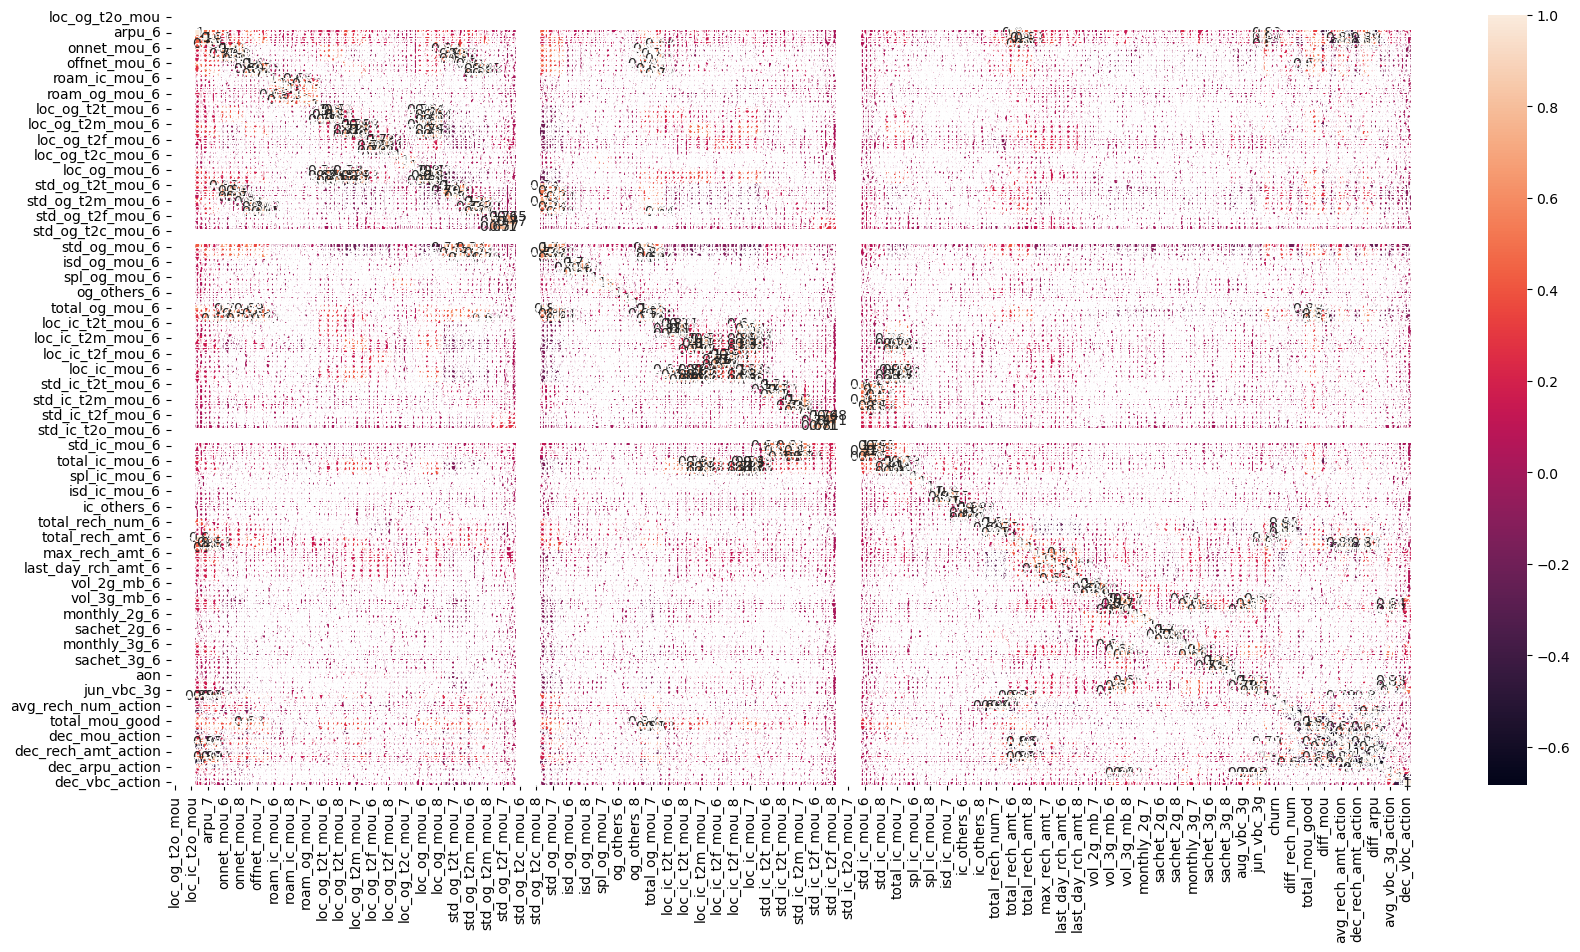

In [79]:
#Correlations
correlation = df02.corr()
plt.figure(figsize = (20,10))
sns.heatmap(correlation, annot = True)

<AxesSubplot:xlabel='churn', ylabel='max_rech_amt_8'>

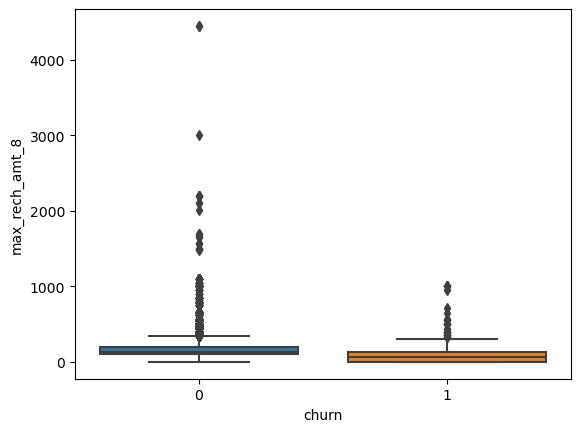

In [80]:
sns.boxplot(x='churn', y='max_rech_amt_8', data = df02)

<AxesSubplot:xlabel='churn', ylabel='arpu_8'>

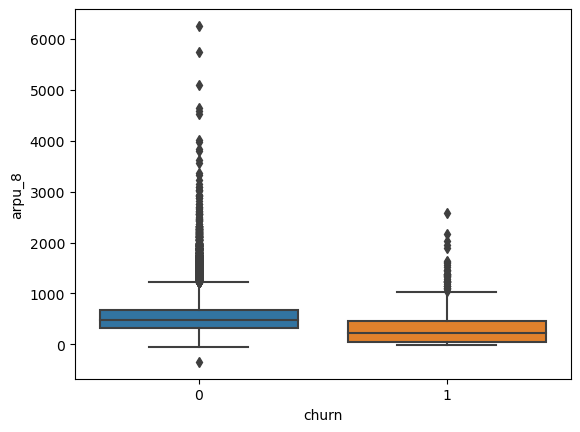

In [81]:
sns.boxplot(x='churn', y='arpu_8', data = df02)

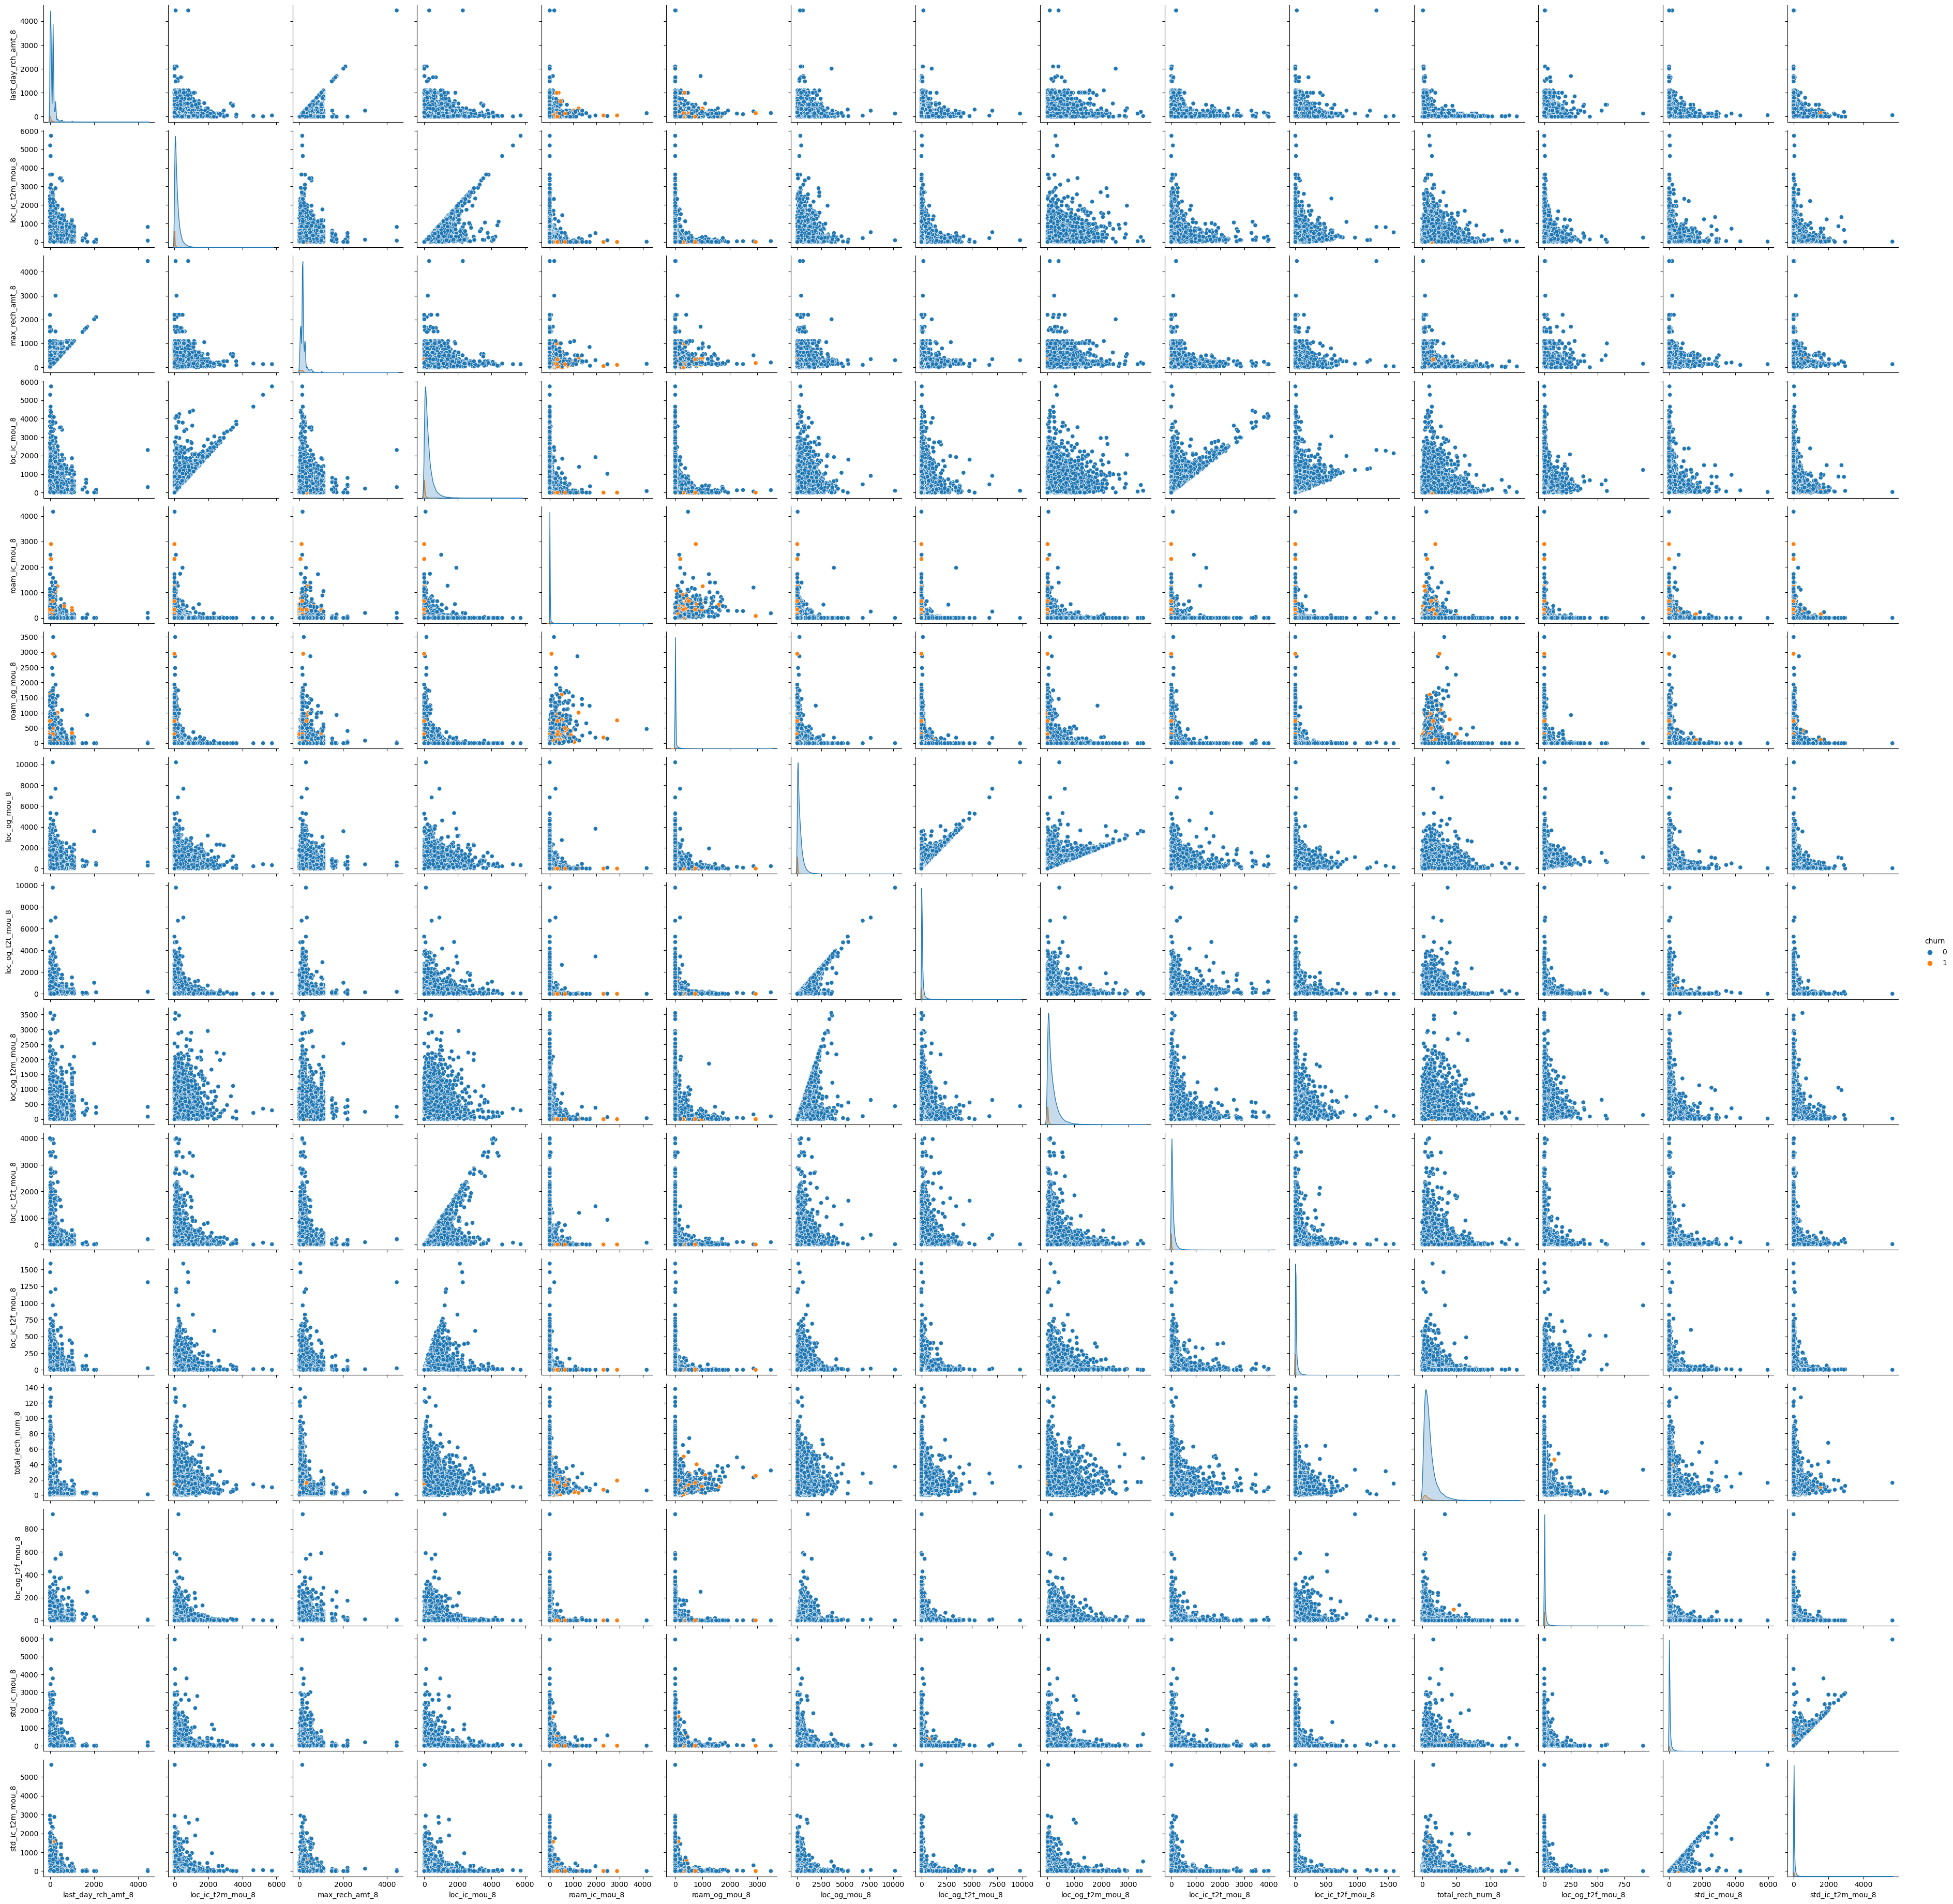

In [83]:
sns.pairplot(data=df02[['last_day_rch_amt_8','loc_ic_t2m_mou_8','max_rech_amt_8', 'loc_ic_mou_8',
                           'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8',
                           'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8',
                           'total_rech_num_8', 'loc_og_t2f_mou_8', 'std_ic_mou_8', 'std_ic_t2m_mou_8', 'churn']],
             hue='churn')

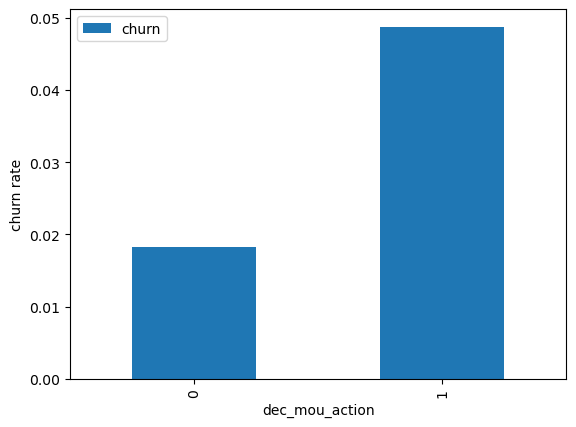

In [79]:
df02.pivot_table(values='churn', index='dec_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see that the consumers with lower minutes of usage (mou) during the action phase as opposed to the good phase have a higher churn rate.

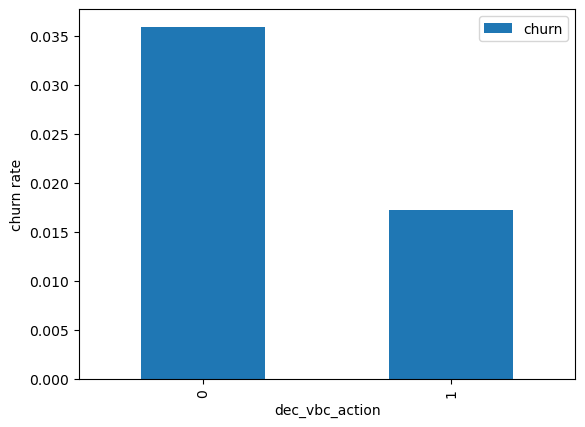

In [80]:
#Churn rate on the basis whether the customer decreased volume based cost in action month
df02.pivot_table(values='churn', index='dec_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

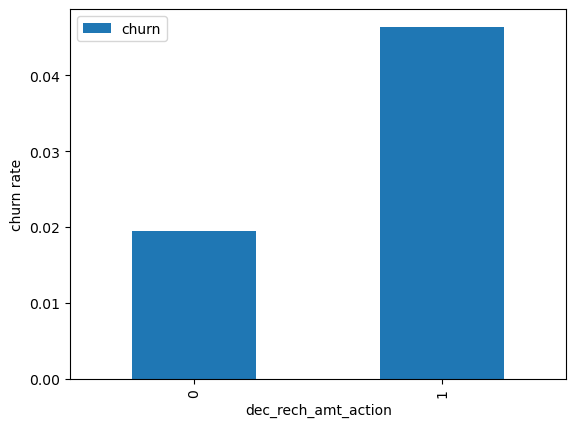

In [81]:
#Churn rate on the basis whether the customer decreased her/his amount of recharge in action month
df02.pivot_table(values='churn', index='dec_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

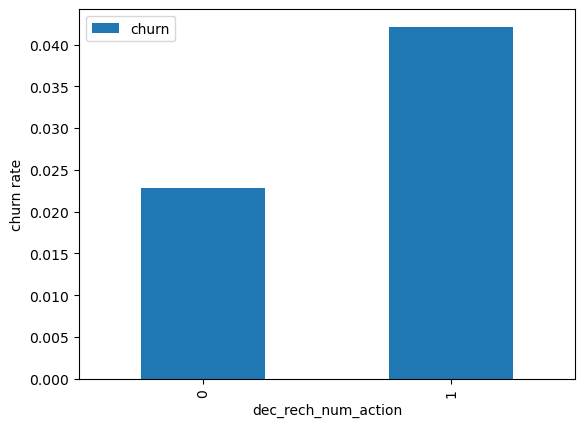

In [82]:
#Churn rate on the basis whether the customer decreased her/his number of recharge in action month
df02.pivot_table(values='churn', index='dec_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [83]:
#Analysis of the average revenue per customer (churn and not churn) in the action phase
# Creating churn dataframe
df02_churn = df02[df02['churn'] == 1]
# Creating not churn dataframe
df02_non_churn = df02[df02['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

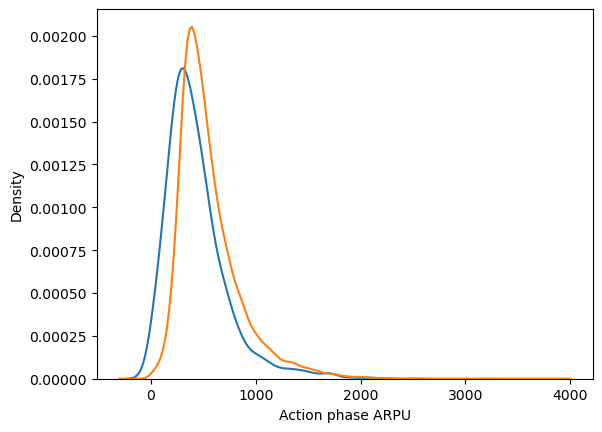

In [84]:
# Distribution plot
ax = sns.distplot(df02_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(df02_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

[Text(0.5, 0, 'Action phase MOU')]

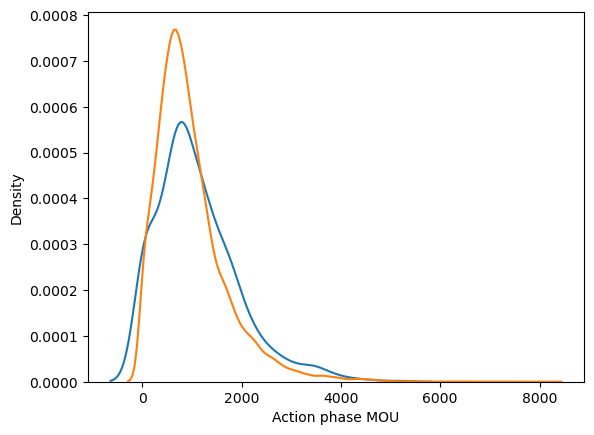

In [85]:
#Analysis of the minutes of usage MOU (churn and not churn) in the action phase
# Distribution plot
ax = sns.distplot(df02_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(df02_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

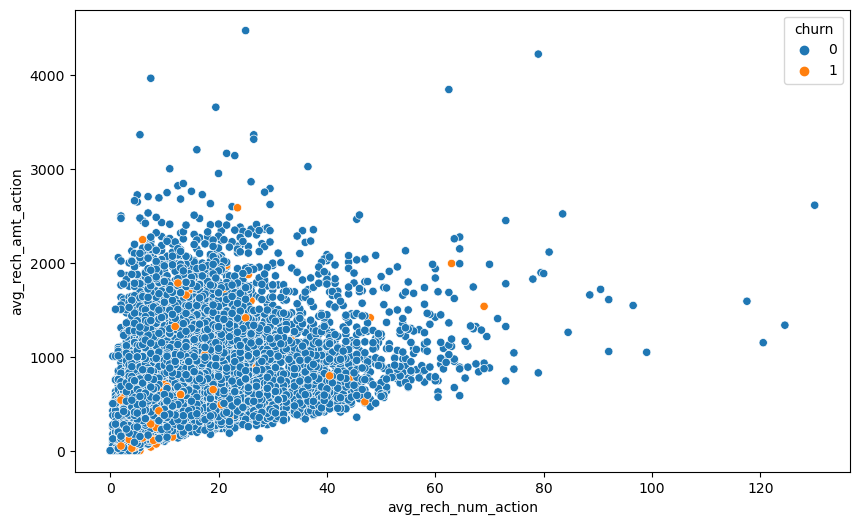

In [86]:
#Analysis of recharge amount and number of recharge in action month
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn', data=df02)

In [87]:
#Dropping few derived columns, which are not required in further analysis
df02 = df02.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

### Train-Test Split

In [88]:
# Putting feature variables into X
X = df02.drop(['mobile_number','churn'], axis=1)

In [89]:
# Putting target variable to y
y = df02['churn']

In [90]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance

In [91]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [92]:
# Instantiate SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=29)

In [93]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [94]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [95]:
# Instantiate the Scaler
scaler = StandardScaler()

In [96]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('dec_mou_action')
cols_scale.remove('dec_rech_num_action')
cols_scale.remove('dec_rech_amt_action')
cols_scale.remove('dec_arpu_action')
cols_scale.remove('dec_vbc_action')

In [97]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [98]:
X_train.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0  0.139632 -0.523974   
1             0.0             0.0             0.0 -1.420346  4.423461   
2             0.0             0.0             0.0 -0.222031  0.541291   
3             0.0             0.0             0.0 -0.906923  0.840152   
4             0.0             0.0             0.0  0.269541  0.245972   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  ...  \
0 -0.280197     0.105769    -0.663229    -0.464761     -0.208329  ...   
1  3.233042    -0.656993    -0.236863    -0.002321     -0.773676  ...   
2  0.799884    -0.599911    -0.600222    -0.329702     -0.360651  ...   
3  0.722450    -0.700605    -0.651592    -0.457429     -0.787398  ...   
4  1.244993    -0.355790    -0.180552     0.117143      0.903010  ...   

   sachet_3g_8       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0    -0.112928 -0.358087   -0.235228   -0.264785    0.111658   
1    -0.112928 -0.788377   -0.254950   -0.264785   -0.258820   
2     2.537100  1.580553    3.316842    2.706475    1.703572   
3    -0.112928 -0.949735   -0.254950   -0.264785   -0.258820   
4    -0.112928 -0.517107   -0.254950   -0.264785   -0.258820   

   dec_rech_num_action  dec_mou_action  dec_rech_amt_action  dec_arpu_action  \
0                    1               1                    1                1   
1                    0               0                    0                0   
2                    0               1                    0                0   
3                    0               0                    0                0   
4                    0               0                    0                0   

   dec_vbc_action  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 138 columns]

In [99]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
5704              0.0             0.0             0.0  0.242634 -0.270188   
64892             0.0             0.0             0.0  0.047688 -0.780614   
39613             0.0             0.0             0.0  0.542250  0.182720   
93118             0.0             0.0             0.0  0.637795  0.814529   
81235             0.0             0.0             0.0  3.858313  0.909451   

         arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  ...  \
5704   0.995691    -0.723590    -0.691425    -0.475644      0.486996  ...   
64892 -0.162458    -0.732344    -0.699291    -0.501290     -0.355807  ...   
39613  1.391201    -0.535972    -0.522472    -0.205249      0.698535  ...   
93118 -0.215252    -0.059124     0.030171    -0.154108     -0.145271  ...   
81235  2.726564     4.105156     1.455634     2.818492      0.000413  ...   

       sachet_3g_8       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
5704      2.537100  0.230053    0.019615    0.197705   -0.258820   
64892    -0.112928  0.628772    2.431050    2.371305    5.870468   
39613    -0.112928  2.980163   -0.254950   -0.264785   -0.258820   
93118    -0.112928  1.752435   -0.254950   -0.264785   -0.258820   
81235     1.212086 -0.241161   -0.254950   -0.264785   -0.258820   

       dec_rech_num_action  dec_mou_action  dec_rech_amt_action  \
5704                     0               0                    1   
64892                    1               1                    1   
39613                    1               1                    1   
93118                    0               1                    1   
81235                    1               1                    1   

       dec_arpu_action  dec_vbc_action  
5704                 1               0  
64892                1               1  
39613                0               0  
93118                1               0  
81235                1               0  

[5 rows x 138 columns]

## PCA

In [100]:
#Import PCA
from sklearn.decomposition import PCA

In [101]:
# Instantiate PCA
pca = PCA(random_state=42)

In [102]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [103]:
# Principal components
pca.components_

array([[-7.88535913e-20, -2.77555756e-17, -2.22044605e-16, ...,
        -2.59725937e-02, -2.59151242e-02,  1.36443875e-02],
       [-1.59177615e-19,  8.32667268e-17, -2.22044605e-16, ...,
        -1.20676441e-02, -1.07063135e-02, -1.47627296e-02],
       [ 1.86684042e-19,  8.32667268e-17, -1.11022302e-16, ...,
        -4.20273499e-02, -4.28835596e-02,  2.46034934e-02],
       ...,
       [ 0.00000000e+00,  8.26925949e-02, -1.61091444e-01, ...,
        -1.34874750e-16,  9.98008100e-17,  3.81639165e-17],
       [ 9.99999624e-01, -7.87791290e-04,  2.21356974e-04, ...,
         3.68459332e-20,  2.00535050e-19, -1.91588265e-17],
       [-0.00000000e+00,  4.05474750e-02,  1.13390305e-01, ...,
         5.39932682e-17,  5.00359303e-17, -7.02563008e-17]])

In [104]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11235322 0.19477815 0.24630342 0.29000181 0.32897011 0.36698171
 0.40235559 0.43214754 0.45761896 0.48250426 0.50539558 0.52737979
 0.54781642 0.56742057 0.58562934 0.60341401 0.61936614 0.63493509
 0.64941303 0.66353504 0.6772303  0.69042238 0.70218152 0.71291109
 0.72321351 0.73302578 0.74272634 0.75220755 0.76162053 0.77030281
 0.77880166 0.78684345 0.79444203 0.80188963 0.80891773 0.81549485
 0.82200227 0.82839452 0.83468704 0.84078377 0.84674089 0.85266902
 0.85826059 0.8636227  0.86889408 0.87404469 0.87880101 0.88333705
 0.88766737 0.89178524 0.8956989  0.89943394 0.90312796 0.90678561
 0.91034911 0.91387888 0.91728472 0.92055427 0.9237269  0.92681289
 0.92986813 0.93284035 0.93567891 0.93850477 0.94126401 0.94399857
 0.94670129 0.94932123 0.95181601 0.95425254 0.95656392 0.95885135
 0.96109197 0.96316821 0.9652043  0.96714983 0.96907975 0.97097132
 0.97281102 0.97461761 0.97634511 0.97801695 0.97966735 0.98127676
 0.98287036 0.98443559 0.98598185 0.98749874 0.98875206 0.9899

Text(0, 0.5, 'Cumulative Variance')

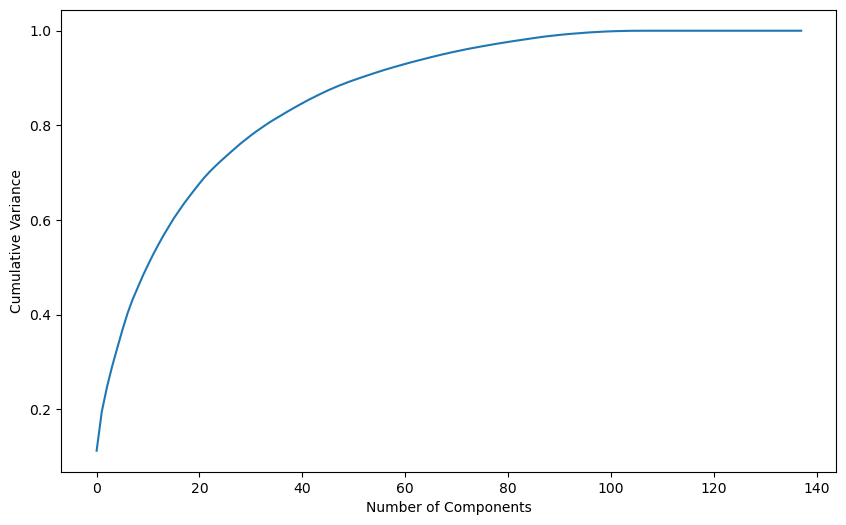

In [105]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [106]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [107]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [108]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [109]:
X_test_pca = pca_final.transform(X_test)

## Logistic regression with PCA

In [110]:
# Importing libraries 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [111]:
# Tuning hyperparameter C: C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [112]:
# results of CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.388682      0.017029         0.003123        0.006247    0.01   
1       0.602599      0.037329         0.007954        0.007095     0.1   
2       0.630640      0.033046         0.003124        0.006249       1   
3       0.686481      0.044478         0.000000        0.000000      10   
4       0.654035      0.018630         0.003139        0.006277     100   
5       0.640049      0.014794         0.005438        0.006783    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.897940           0.907796           0.902093   
1   {'C': 0.1}           0.897703           0.905229           0.903721   
2     {'C': 1}           0.899361           0.905229           0.903953   
3    {'C': 10}           0.899124           0.905462           0.904186   
4   {'C': 100}           0.898887           0.905462           0.904186   
5  {'C': 1000}           0.898887           0.905462           0.903953   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.899209  ...         0.900029        0.004849                5   
1           0.898510  ...         0.899839        0.004103                6   
2           0.896648  ...         0.900168        0.003831                4   
3           0.896648  ...         0.900260        0.003898                1   
4           0.896881  ...         0.900213        0.003925                2   
5           0.896881  ...         0.900213        0.003825                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.902279            0.900239            0.900204   
1            0.902918            0.901114            0.900204   
2            0.902744            0.900531            0.900438   
3            0.902511            0.900881            0.900146   
4            0.902569            0.900823            0.900146   
5            0.902628            0.900823            0.900204   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.897601            0.899141          0.899893         0.001532  
1            0.899060            0.900544          0.900768         0.001267  
2            0.899644            0.900602          0.900792         0.001035  
3            0.899585            0.900836          0.900792         0.000984  
4            0.899585            0.900836          0.900792         0.001004  
5            0.899585            0.900719          0.900792         0.001018  

[6 rows x 21 columns]

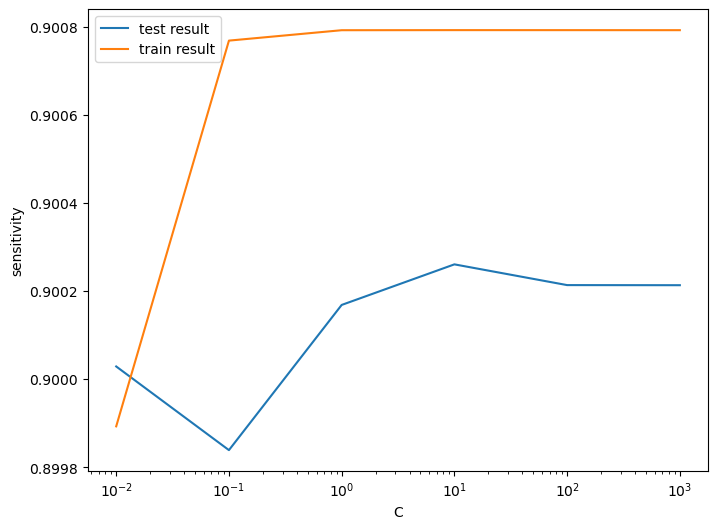

In [113]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [114]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9002603316022956 at C = 10


In [115]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [116]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [117]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [118]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17903  3522]
 [ 2134 19291]]


In [119]:
# true positive
TP = confusion[1,1]  
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0] 

In [120]:
#Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.868004667444574
Sensitivity:- 0.9003967327887982
Specificity:- 0.83561260210035


In [121]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [122]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4449  899]
 [  36  157]]


In [123]:
# true positive
TP = confusion[1,1]  
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0] 

In [124]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8312578956866992
Sensitivity:- 0.8134715025906736
Specificity:- 0.8318997756170531


### Decision tree

In [125]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [126]:
#Hyperparameter tuning
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [127]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.321357      0.070262         0.005557        0.005491   
1       1.254496      0.007044         0.003124        0.006249   
2       1.240575      0.011145         0.006596        0.008096   
3       1.308937      0.078806         0.005137        0.006425   
4       2.082475      0.007330         0.007734        0.006614   
5       2.134178      0.093265         0.006300        0.007753   
6       2.046317      0.084400         0.010470        0.007163   
7       1.996785      0.011623         0.004449        0.006161   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.859977   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.859977   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.858343   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.858343   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.877246   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.877246   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.869778   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.869778   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.843641           0.868611           0.847141           0.852042   
1           0.843641           0.868611           0.847141           0.852042   
2           0.840840           0.867911           0.845041           0.852042   
3           0.840840           0.867911           0.845041           0.852042   
4           0.916919           0.901517           0.899650           0.906884   
5           0.916919           0.901517           0.899650           0.906418   
6           0.886114           0.894282           0.881447           0.888915   
7           0.886114           0.894282           0.881447           0.888915   

   mean_test_score  std_test_score  rank_test_score  
0         0.854282        0.009022                5  
1         0.854282        0.009022                5  
2         0.852835        0.009622                7  
3         0.852835        0.009622                7  
4         0.900443        0.013060                1  
5         0.900350        0.013015                2  
6         0.884107        0.008283                3  
7         0.884107        0.008283                3

In [128]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9004434072345392
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [129]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [130]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [131]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18670  2755]
 [ 1701 19724]]


In [132]:
# true positive
TP = confusion[1,1]  
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0] 

In [133]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8960093348891482
Sensitivity:- 0.9206067677946325
Specificity:- 0.8714119019836639


In [134]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [135]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4580  768]
 [  61  132]]


In [136]:
# true positive
TP = confusion[1,1]  
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0] 

In [137]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8503880166035012
Sensitivity:- 0.6839378238341969
Specificity:- 0.856394913986537


### Logistic regression without PCA

In [138]:
# Importing stats model
import statsmodels.api as sm

In [139]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [140]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [141]:
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42720
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 04 Sep 2023   Deviance:                       23758.
Time:                        12:50:24   Pearson chi2:                 3.73e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -72.5565   4452.046     -0.016      0.987   -8798.405    8653.292
loc_og_t2o_mou      -1.894e-06      0.000     -0.017      0.987      -0.000       0.000
std_og_t2o_mou       -1.01e-06   9.64e-05     -0.010      0.992      -0.000       0.000
loc_ic_t2o_mou       7.451e-06      0.000      0.016      0.987      -0.001       0.001
arpu_6                  0.0089      0.080      0.112      0.911      -0.147       0.165
arpu_7                  0.0604      0.085      0.709      0.479      -0.107       0.227
arpu_8                  0.0748      0.109      0.688      0.492      -0.138       0.288
onnet_mou_6            17.0626      3.519      4.849      0.000      10.166      23.960
onnet_mou_7            -5.4576      1.749     -3.121      0.002      -8.885      -2.030
onnet_mou_8             1.8608      1.676      1.111      0.267      -1.423       5.145
offnet_mou_6           16.6717      3.297      5.056      0.000      10.209      23.135
offnet_mou_7           -2.8674      1.674     -1.713      0.087      -6.149       0.414
offnet_mou_8           -1.0601      1.751     -0.606      0.545      -4.491       2.371
roam_ic_mou_6           0.1882      0.036      5.279      0.000       0.118       0.258
roam_ic_mou_7           0.0112      0.050      0.227      0.821      -0.086       0.108
roam_ic_mou_8           0.1797      0.043      4.206      0.000       0.096       0.263
roam_og_mou_6          -5.7336      1.114     -5.149      0.000      -7.916      -3.551
roam_og_mou_7           1.2037      0.455      2.648      0.008       0.313       2.095
roam_og_mou_8           0.2423      0.496      0.488      0.625      -0.730       1.215
loc_og_t2t_mou_6    -3728.6839    652.285     -5.716      0.000   -5007.139   -2450.229
loc_og_t2t_mou_7    -1141.4579    688.151     -1.659      0.097   -2490.210     207.294
loc_og_t2t_mou_8     4765.5576    625.340      7.621      0.000    3539.913    5991.202
loc_og_t2m_mou_6    -3782.1893    661.526     -5.717      0.000   -5078.757   -2485.622
loc_og_t2m_mou_7    -1059.2892    637.752     -1.661      0.097   -2309.260     190.681
loc_og_t2m_mou_8     5079.9748    666.405      7.623      0.000    3773.846    6386.104
loc_og_t2f_mou_6     -323.7282     56.652     -5.714      0.000    -434.764    -212.693
loc_og_t2f_mou_7      -93.7696     56.501     -1.660      0.097    -204.510      16.970
loc_og_t2f_mou_8      420.8827     55.243      7.619      0.000     312.608     529.158
loc_og_t2c_mou_6        0.0398      0.021      1.861      0.063      -0.002       0.082
loc_og_t2c_mou_7        0.0008      0.022      0.037      0.971      -0.042       0.044
loc_og_t2c_mou_8        0.0640      0.022      2.942      0.003       0.021       0.107
loc_og_mou_6         4186.0296   1266.052      3.306      0.001    1704.613    6667.446
loc

##### Model analysis

We can see that there are few features have positive coefficients and few have negative.
Many features have higher p-values and hence became insignificant in the model.

###### Coarse tuning (Auto+Manual)

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

In [142]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

In [143]:
# Intantiate the logistic regression
logreg = LogisticRegression()

In [144]:
# Importing RFE
from sklearn.feature_selection import RFE

# Instantiate RFE with the estimator (e.g., logreg) and the number of features to select (15 in this case)
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the rfe model with the train set
rfe = rfe.fit(X_train, y_train)

In [145]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_7', 'og_others_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8',
       'monthly_2g_8', 'monthly_3g_8', 'dec_vbc_action'],
      dtype='object')


### Model-1 with RFE selected columns

In [146]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 04 Sep 2023   Deviance:                       31225.
Time:                        12:52:26   Pearson chi2:                 5.84e+06
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -53.2863   4235.177     -0.013      0.990   -8354.081    8247.508
offnet_mou_7         0.6288      0.026     23.888      0.000       0.577       0.680
offnet_mou_8        -3.3671      0.109    -30.962      0.000      -3.580      -3.154
roam_og_mou_8        1.2513      0.032     38.518      0.000       1.188       1.315
std_og_t2m_mou_8     2.4817      0.095     26.010      0.000       2.295       2.669
isd_og_mou_8        -0.7937      0.164     -4.837      0.000      -1.115      -0.472
og_others_7         -1.7031      0.913     -1.864      0.062      -3.493       0.087
og_others_8      -3803.3417   3.08e+05     -0.012      0.990   -6.08e+05    6.01e+05
loc_ic_t2m_mou_7     0.4443      0.043     10.287      0.000       0.360       0.529
loc_ic_t2m_mou_8    -1.0665      0.098    -10.912      0.000      -1.258      -0.875
loc_ic_t2f_mou_8    -0.7950      0.066    -11.959      0.000      -0.925      -0.665
total_ic_mou_8      -1.4252      0.071    -20.052      0.000      -1.565      -1.286
ic_others_8         -1.4036      0.133    -10.532      0.000      -1.665      -1.142
monthly_2g_8        -0.9145      0.045    -20.224      0.000      -1.003      -0.826
monthly_3g_8        -1.0034      0.045    -22.120      0.000      -1.092      -0.914
dec_vbc_action      -1.2211      0.071    -17.223      0.000      -1.360      -1.082
====================================================================================
"""

In [147]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1       offnet_mou_8  7.94
3   std_og_t2m_mou_8  6.83
8   loc_ic_t2m_mou_8  5.35
7   loc_ic_t2m_mou_7  3.30
10    total_ic_mou_8  3.18
0       offnet_mou_7  2.03
2      roam_og_mou_8  1.18
9   loc_ic_t2f_mou_8  1.18
14    dec_vbc_action  1.07
13      monthly_3g_8  1.06
6        og_others_8  1.05
12      monthly_2g_8  1.05
5        og_others_7  1.04
11       ic_others_8  1.04
4       isd_og_mou_8  1.01

In [149]:
#Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'total_ic_mou_8', 'ic_others_8', 'monthly_2g_8', 'monthly_3g_8', 'dec_vbc_action']


### Model-2
Building the model after removing og_others_8 variable.

In [150]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15649.
Date:                Mon, 04 Sep 2023   Deviance:                       31298.
Time:                        12:52:27   Pearson chi2:                 5.75e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4810
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0662      0.031    -34.642      0.000      -1.127      -1.006
offnet_mou_7         0.6268      0.026     23.856      0.000       0.575       0.678
offnet_mou_8        -3.3700      0.109    -31.025      0.000      -3.583      -3.157
roam_og_mou_8        1.2507      0.032     38.658      0.000       1.187       1.314
std_og_t2m_mou_8     2.4840      0.095     26.064      0.000       2.297       2.671
isd_og_mou_8        -0.8727      0.174     -5.003      0.000      -1.215      -0.531
og_others_7         -2.1929      0.869     -2.522      0.012      -3.897      -0.489
loc_ic_t2m_mou_7     0.4471      0.043     10.355      0.000       0.362       0.532
loc_ic_t2m_mou_8    -1.0617      0.098    -10.864      0.000      -1.253      -0.870
loc_ic_t2f_mou_8    -0.7935      0.066    -11.939      0.000      -0.924      -0.663
total_ic_mou_8      -1.4323      0.071    -20.124      0.000      -1.572      -1.293
ic_others_8         -1.3992      0.133    -10.505      0.000      -1.660      -1.138
monthly_2g_8        -0.9200      0.046    -20.202      0.000      -1.009      -0.831
monthly_3g_8        -1.0017      0.045    -22.103      0.000      -1.091      -0.913
dec_vbc_action      -1.2221      0.071    -17.250      0.000      -1.361      -1.083
====================================================================================
"""

In [151]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1       offnet_mou_8  7.94
3   std_og_t2m_mou_8  6.82
7   loc_ic_t2m_mou_8  5.34
6   loc_ic_t2m_mou_7  3.30
9     total_ic_mou_8  3.18
0       offnet_mou_7  2.03
2      roam_og_mou_8  1.18
8   loc_ic_t2f_mou_8  1.18
13    dec_vbc_action  1.07
12      monthly_3g_8  1.06
11      monthly_2g_8  1.05
10       ic_others_8  1.03
4       isd_og_mou_8  1.01
5        og_others_7  1.00

In [152]:
#As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8',)
log_cols.remove('std_og_t2m_mou_8',)

### Model-3
Model after removing offnet_mou_8 column.

In [153]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42837
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16485.
Date:                Mon, 04 Sep 2023   Deviance:                       32970.
Time:                        12:52:27   Pearson chi2:                 4.45e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4604
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2269      0.031    -39.173      0.000      -1.288      -1.166
offnet_mou_7         0.1303      0.014      9.601      0.000       0.104       0.157
roam_og_mou_8        0.7034      0.025     28.567      0.000       0.655       0.752
isd_og_mou_8        -1.0614      0.182     -5.828      0.000      -1.418      -0.704
og_others_7         -2.6996      0.893     -3.024      0.002      -4.449      -0.950
loc_ic_t2m_mou_7     0.7516      0.043     17.667      0.000       0.668       0.835
loc_ic_t2m_mou_8    -2.5818      0.095    -27.108      0.000      -2.768      -2.395
loc_ic_t2f_mou_8    -0.8269      0.068    -12.112      0.000      -0.961      -0.693
total_ic_mou_8      -1.7286      0.073    -23.524      0.000      -1.873      -1.585
ic_others_8         -1.4456      0.130    -11.138      0.000      -1.700      -1.191
monthly_2g_8        -0.9395      0.046    -20.587      0.000      -1.029      -0.850
monthly_3g_8        -1.1037      0.049    -22.647      0.000      -1.199      -1.008
dec_vbc_action      -1.2482      0.070    -17.820      0.000      -1.385      -1.111
====================================================================================
"""

In [154]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5   loc_ic_t2m_mou_8  5.00
4   loc_ic_t2m_mou_7  3.20
7     total_ic_mou_8  3.12
6   loc_ic_t2f_mou_8  1.17
11    dec_vbc_action  1.07
10      monthly_3g_8  1.06
9       monthly_2g_8  1.05
1      roam_og_mou_8  1.04
0       offnet_mou_7  1.03
8        ic_others_8  1.03
2       isd_og_mou_8  1.00
3        og_others_7  1.00

### Model performance on the train set

In [155]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    4.057826e-01
1    3.490381e-01
2    5.614288e-02
3    7.158808e-03
4    3.327448e-19
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [156]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

churn    churn_prob  CustID
0      0  4.057826e-01       0
1      0  3.490381e-01       1
2      0  5.614288e-02       2
3      0  7.158808e-03       3
4      0  3.327448e-19       4

##### Finding Optimal Probablity Cutoff Point

In [157]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

churn    churn_prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0  4.057826e-01       0    1    1    1    1    1    0    0    0    0   
1      0  3.490381e-01       1    1    1    1    1    0    0    0    0    0   
2      0  5.614288e-02       2    1    0    0    0    0    0    0    0    0   
3      0  7.158808e-03       3    1    0    0    0    0    0    0    0    0   
4      0  3.327448e-19       4    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [158]:
#calculate the accuracy sensitivity and specificity for various probability cutoffs.
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.748495     0.982124     0.514866
0.2          0.2  0.780513     0.967095     0.593932
0.3          0.3  0.803034     0.951365     0.654702
0.4          0.4  0.820303     0.930735     0.709872
0.5          0.5  0.835053     0.903057     0.767048
0.6          0.6  0.840467     0.854842     0.826091
0.7          0.7  0.835963     0.778856     0.893069
0.8          0.8  0.751552     0.543291     0.959813
0.9          0.9  0.571272     0.157060     0.985484


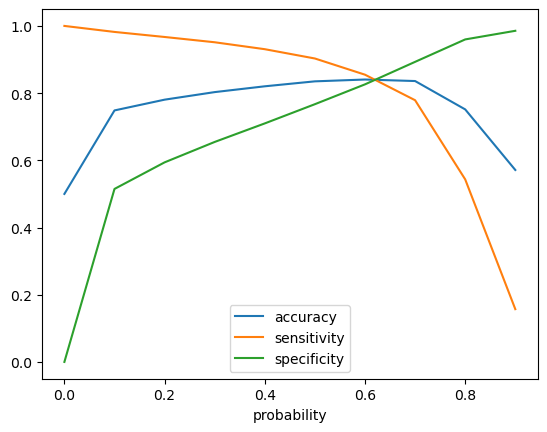

In [159]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

###### Analysis of the curve
We can observe that there is an accurate balance between sensitivity and specificity at point 0.6 where the three parameters cross each other.

In [160]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

churn    churn_prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0  4.057826e-01       0    1    1    1    1    1    0    0    0    0   
1      0  3.490381e-01       1    1    1    1    1    0    0    0    0    0   
2      0  5.614288e-02       2    1    0    0    0    0    0    0    0    0   
3      0  7.158808e-03       3    1    0    0    0    0    0    0    0    0   
4      0  3.327448e-19       4    1    0    0    0    0    0    0    0    0   

   0.9  predicted  
0    0          0  
1    0          0  
2    0          0  
3    0          0  
4    0          0

In [161]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16434  4991]
 [ 2077 19348]]


In [162]:
# true positive
TP = confusion[1,1]  
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0] 

In [163]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8350525087514585
Sensitivity:- 0.9030571761960327
Specificity:- 0.7670478413068845


In [164]:
#Plotting the ROC Curve (Trade off between sensitivity & specificity)
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

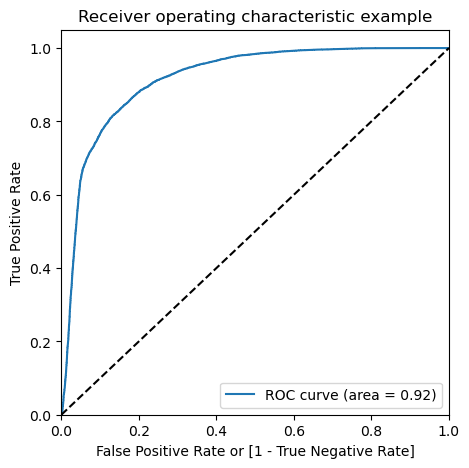

In [165]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

##### Testing the model on the test set

In [166]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [167]:
# Taking only the columns
X_test_log = X_test_log[log_cols]

In [168]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [169]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [170]:
y_test_pred.head()

5704     0.072209
64892    0.000424
39613    0.321431
93118    0.044765
81235    0.009665
dtype: float64

In [171]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
5704   0.072209
64892  0.000424
39613  0.321431
93118  0.044765
81235  0.009665

In [172]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
5704       0
64892      0
39613      0
93118      0
81235      0

In [173]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [174]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [175]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [176]:
y_test_pred_final.head()

churn  CustID         0
0      0    5704  0.072209
1      0   64892  0.000424
2      0   39613  0.321431
3      0   93118  0.044765
4      0   81235  0.009665

In [177]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [178]:
y_test_pred_final = y_test_pred_final.reindex(['CustID','churn','churn_prob'], axis=1)
y_test_pred_final.head()

CustID  churn  churn_prob
0    5704      0    0.072209
1   64892      0    0.000424
2   39613      0    0.321431
3   93118      0    0.044765
4   81235      0    0.009665

In [179]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

CustID  churn  churn_prob  test_predicted
0    5704      0    0.072209               0
1   64892      0    0.000424               0
2   39613      0    0.321431               0
3   93118      0    0.044765               0
4   81235      0    0.009665               0

In [180]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4066 1282]
 [  33  160]]


In [181]:
# true positive
TP = confusion[1,1]  
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0] 

In [182]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.7626782169283522
Sensitivity:- 0.8290155440414507
Specificity:- 0.7602842183994016


##### conclusion
We can see that the accuracy and sensitivity of the logistic model without PCA are good and equivalent to those of the models with PCA. Therefore, since logistic regression with PCA explains the key predictor factors as well as the relevance of each variable, we can choose this model over a more complex one. The model also assists us in determining the variables that should be considered when deciding which clients to lose. As a result, the model is more appropriate for explaining to the business.

##### Recomendation
The top variables chosen for the logistic regression model are listed below.
1. loc_ic_mou_8 
2. std_ic_t2f_mou_8 
3. monthly_2g_8 
4. monthly_3g_8 
5. og_others_7 
6. ic_others_8
7. isd_og_mou_8 
8. decrease_vbc_action 

